In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [4]:
#STEP1: FILLING THE NULL VALUES WITH SOME VALUES
df['afftype'].fillna(0, inplace=True) #afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
df['melanch'].fillna(2, inplace=True) #melanch (1: melancholia, 2: no melancholia)
df['inpatient'].fillna(2, inplace=True) #inpatient (1: inpatient, 2: outpatient)
df['marriage'].fillna(1, inplace=True) #marriage (1: married or cohabiting, 2: single)
df['work'].fillna(1, inplace=True) #work (1: working or studying, 2: unemployed/sick leave/pension)
df['edu'].fillna("6-10", inplace=True) #edu (education grouped in years)
df.loc[df['number'] == 'condition_22', 'edu'] = "6-10"

<ipython-input-4-b9ddb6b552de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['afftype'].fillna(0, inplace=True) #afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
<ipython-input-4-b9ddb6b552de>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [5]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [6]:
#STEP 2: MAKING A SINGLE COLUMN AS THE OUTPUT
df['madrs'] = df['madrs2'] + df['madrs1'] #madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped).

In [7]:
df['madrs'].fillna(3, inplace=True) #0-6 means no depression, hence we used the median value 3 for people with no depression
df=df.drop(columns=['madrs1','madrs2'])
df

<ipython-input-7-15763a861907>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['madrs'].fillna(3, inplace=True) #0-6 means no depression, hence we used the median value 3 for people with no depression


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,38.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,35.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,49.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,36.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,52.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,33.0
6,condition_7,11,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,49.0
7,condition_8,5,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,36.0
8,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,52.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,49.0


In [8]:
#STEP3:LABEL ENCODNG
categorical_cols = ['age', 'edu'] #they are categorical values
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
def categorize_depression(madrs_score): #madrs scale
    if 0 <= madrs_score <= 6:
        return 'No depression'
    elif 7 <= madrs_score <= 19:
        return 'Mild depression'
    elif 20 <= madrs_score <= 34:
        return 'Moderate depression'
    elif 35 <= madrs_score <= 60:
        return 'Severe depression'
    else:
        return 'Unknown'

In [10]:
# Apply the function to create a new 'depression' column
df['depression'] = df['madrs'].apply(categorize_depression)

In [11]:
#STEP 4:DROPPING IRRELEVANT COLUMNS
df=df.drop(columns=['number'])
df=df.drop(columns=['days'])
df=df.drop(columns=['madrs'])

In [12]:
df

,gender,age,afftype,melanch,inpatient,edu,marriage,work,depression
0,2,3,2.0,2.0,2.0,2,1.0,2.0,Severe depression
1,2,4,1.0,2.0,2.0,2,2.0,2.0,Severe depression
2,1,5,2.0,2.0,2.0,2,2.0,2.0,Severe depression
3,2,1,2.0,2.0,2.0,0,1.0,1.0,Severe depression
4,2,6,2.0,2.0,2.0,0,2.0,2.0,Severe depression
5,1,3,2.0,2.0,2.0,2,1.0,2.0,Moderate depression
6,1,0,1.0,2.0,2.0,0,2.0,1.0,Severe depression
7,2,1,2.0,2.0,2.0,0,1.0,2.0,Severe depression
8,2,5,1.0,2.0,2.0,2,1.0,2.0,Severe depression
9,2,5,2.0,2.0,2.0,2,1.0,2.0,Severe depression


In [13]:
depression_mapping = {'No depression': 0, 'Mild depression': 1, 'Moderate depression':2, 'Severe depression':3}
df['depression_encoded'] = df['depression'].map(depression_mapping) #to feed into the model

In [14]:
df

,gender,age,afftype,melanch,inpatient,edu,marriage,work,depression,depression_encoded
0,2,3,2.0,2.0,2.0,2,1.0,2.0,Severe depression,3
1,2,4,1.0,2.0,2.0,2,2.0,2.0,Severe depression,3
2,1,5,2.0,2.0,2.0,2,2.0,2.0,Severe depression,3
3,2,1,2.0,2.0,2.0,0,1.0,1.0,Severe depression,3
4,2,6,2.0,2.0,2.0,0,2.0,2.0,Severe depression,3
5,1,3,2.0,2.0,2.0,2,1.0,2.0,Moderate depression,2
6,1,0,1.0,2.0,2.0,0,2.0,1.0,Severe depression,3
7,2,1,2.0,2.0,2.0,0,1.0,2.0,Severe depression,3
8,2,5,1.0,2.0,2.0,2,1.0,2.0,Severe depression,3
9,2,5,2.0,2.0,2.0,2,1.0,2.0,Severe depression,3


In [15]:
df=df.drop(columns=['depression'])

In [16]:
df

,gender,age,afftype,melanch,inpatient,edu,marriage,work,depression_encoded
0,2,3,2.0,2.0,2.0,2,1.0,2.0,3
1,2,4,1.0,2.0,2.0,2,2.0,2.0,3
2,1,5,2.0,2.0,2.0,2,2.0,2.0,3
3,2,1,2.0,2.0,2.0,0,1.0,1.0,3
4,2,6,2.0,2.0,2.0,0,2.0,2.0,3
5,1,3,2.0,2.0,2.0,2,1.0,2.0,2
6,1,0,1.0,2.0,2.0,0,2.0,1.0,3
7,2,1,2.0,2.0,2.0,0,1.0,2.0,3
8,2,5,1.0,2.0,2.0,2,1.0,2.0,3
9,2,5,2.0,2.0,2.0,2,1.0,2.0,3


In [17]:
#STEP 5:FINALISING THE OUTPUT AND INPUT COLUMNS
y = df['depression_encoded']
X = df.drop(columns=['depression_encoded'])

In [18]:
#STEP 6:APPLYING RANDOM FOREST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

accuracy_percentage = r2 * 100
print(f"R-squared Accuracy Percentage: {accuracy_percentage:.2f}%")

Mean Squared Error: 0.1402363636363636
Mean Absolute Error: 0.1909090909090909
R-squared Score: 0.9087709677419354
R-squared Accuracy Percentage: 90.88%


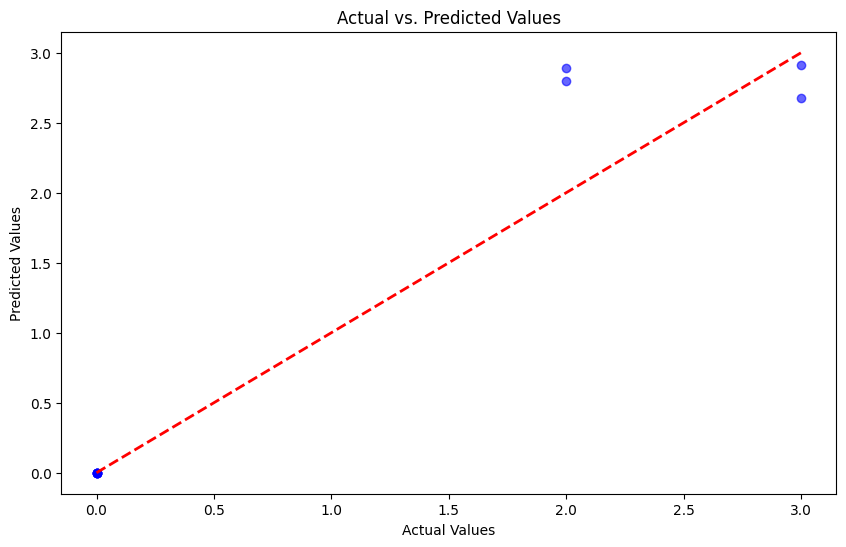

In [19]:
# Scatter Plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

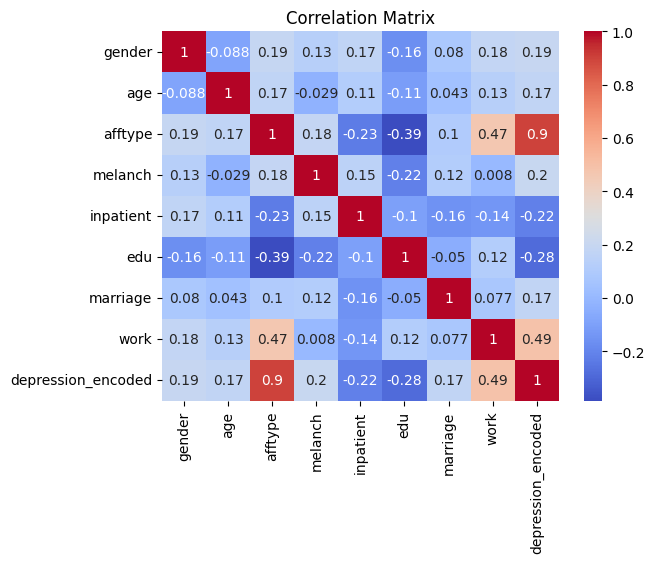

In [23]:
#Correlation Matrix
correlation_matrix = df.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
#Co-variance matrix
covariance_matrix = df.cov()
print(covariance_matrix)

                      gender       age   afftype   melanch  inpatient  \
gender              0.252525 -0.107744  0.089226  0.021886   0.030303   
age                -0.107744  6.002020  0.390572 -0.023906   0.099663   
afftype             0.089226  0.390572  0.868687  0.057239  -0.077441   
melanch             0.021886 -0.023906  0.057239  0.113131   0.018182   
inpatient           0.030303  0.099663 -0.077441  0.018182   0.126599   
edu                -0.067340 -0.225589 -0.292929 -0.058923  -0.030303   
marriage            0.020202  0.052862  0.047138  0.019529  -0.027946   
work                0.045455  0.156902  0.217172  0.001347  -0.024916   
depression_encoded  0.136364  0.585522  1.170034  0.092929  -0.108081   

                         edu  marriage      work  depression_encoded  
gender             -0.067340  0.020202  0.045455            0.136364  
age                -0.225589  0.052862  0.156902            0.585522  
afftype            -0.292929  0.047138  0.217172        

In [26]:
#STEP 7: Deployment
depression_labels = {
    0: "No depression",
    1: "Mild depression",
    2: "Moderate depression",
    3: "Severe depression"
}

def predict_depression_level(input_features):
    input_df = pd.DataFrame([input_features])

    prediction_encoded = rf_model.predict(input_df)
    prediction_encoded = round(prediction_encoded[0])
    prediction_label = depression_labels.get(prediction_encoded, "Unknown")

    return prediction_label

In [27]:
#Prediction example for our deployed model
input_example = {
    "gender" : 1,
    "age" : 25,
    "afftype": 2,
    "melanch": 2,
    "inpatient": 2,
    "edu": 2,
    "marriage": 1,
    "work": 1,
}

# Predict and print the result
predicted_depression = predict_depression_level(input_example)
print("Predicted Depression Level:", predicted_depression)

Predicted Depression Level: Moderate depression


In [28]:
import pickle #to save the model

In [29]:
#STEP 8: Saving our model as a pickle file
with open ('rf_model.pkl','wb' ) as f:
  pickle.dump(rf_model, f)